**Performing analysis on Iris dataset


In [1]:
import datasets

c:\DSDBA-lab\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [5]:
#information about dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [6]:
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [ ]:
#describing the dataset
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
#checking the datatypes
iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object

Data Normalization

In [11]:
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
scaler = MinMaxScaler()
iris_df[columns_to_normalize] = scaler.fit_transform(iris_df[columns_to_normalize])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2.0
146,0.555556,0.208333,0.677966,0.750000,2.0
147,0.611111,0.416667,0.711864,0.791667,2.0
148,0.527778,0.583333,0.745763,0.916667,2.0


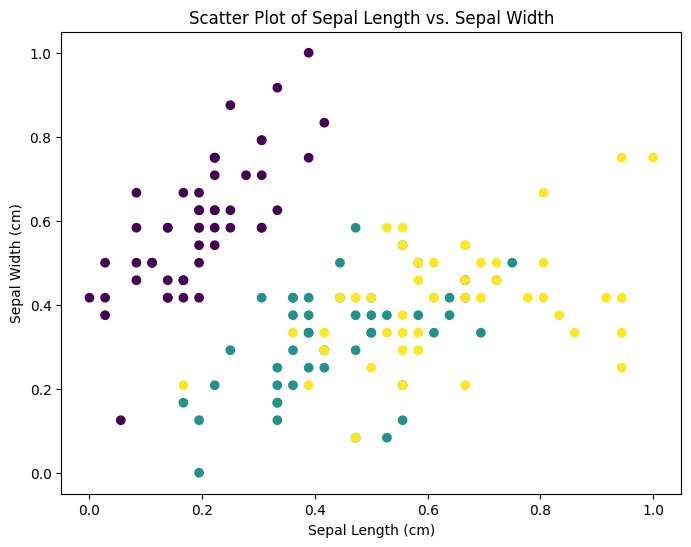

In [12]:
#scatter plot after standardizing the data between sepal lenght and width
plt.figure(figsize=(8,6))
plt.scatter(iris_df['sepal length (cm)'],iris_df['sepal width (cm)'],c=iris_df['target'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Sepal Length vs. Sepal Width')
plt.show()

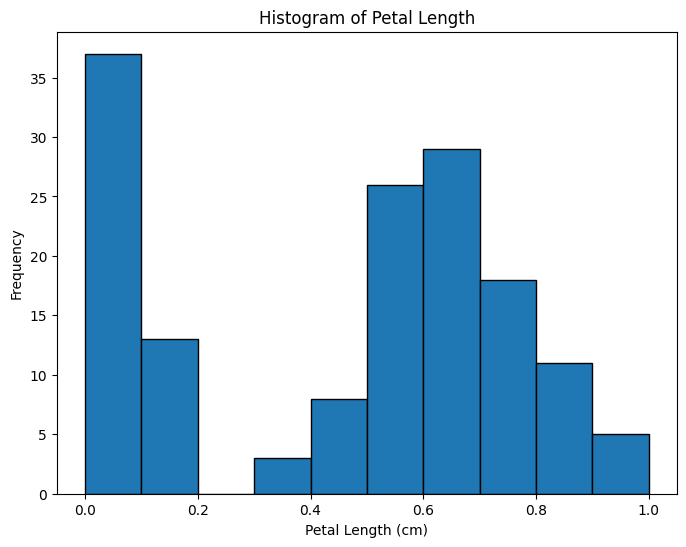

In [13]:
#histogram
plt.figure(figsize=(8, 6))
plt.hist(iris_df['petal length (cm)'], bins=10, edgecolor='black')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Length')
plt.show()

C:\Users\nisha\AppData\Local\Temp\ipykernel_31916\718024643.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], iris_df['petal length (cm)'], iris_df['petal width (cm)']],


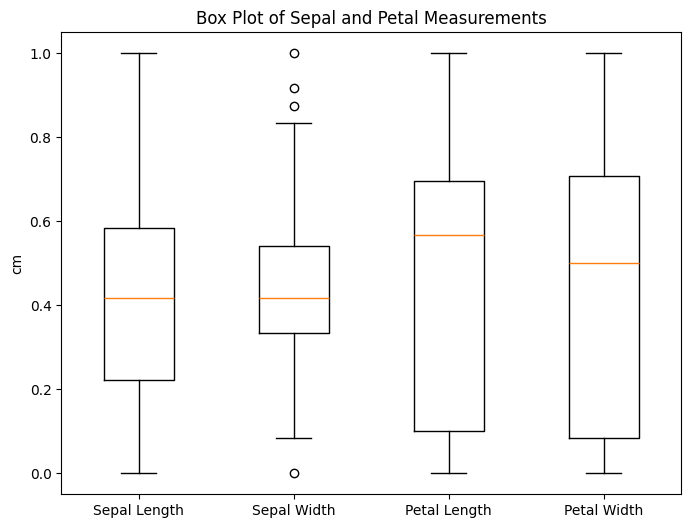

In [14]:
#box plot
plt.figure(figsize=(8, 6))
plt.boxplot([iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], iris_df['petal length (cm)'], iris_df['petal width (cm)']],
            labels=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
plt.ylabel('cm')
plt.title('Box Plot of Sepal and Petal Measurements')
plt.show()